In [1]:
#FOR EDA AND VISUALISATION
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np


In [5]:
import os
!pip install matplotlib
!pip install --upgrade matplotlib
#%matplotlib
import matplotlib.pyplot as plt
import numpy as np
!pip install seaborn
import seaborn as sns
%matplotlib inline

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
hd = pd.read_csv('housingdata.csv')
# Identify non-numeric columns
non_numeric_cols = hd.select_dtypes(include=['object']).columns
print(non_numeric_cols)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')


In [15]:
hd
hd.head(10)

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
5,5,SC50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,No,MnPrv,Shed,700,Oct,2009,WD,Normal,143000
6,6,SC20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,307000
7,7,SC60,RL,0,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,Shed,350,Nov,2009,WD,Normal,200000
8,8,SC50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
9,9,SC190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000


In [17]:
hd.shape

(1460, 81)

In [36]:
# DATA PROCESSING
obj = (hd.dtypes =='object')
object_cols = list(obj[obj].index)
print('categorical variables',len(object_cols))
     

categorical variables 45


In [38]:
Int = (hd.dtypes == 'int')
Int_cols = list(Int[Int].index)
print('Integers variables', len(Int_cols))
     

Integers variables 0


In [40]:
Float = (hd.dtypes == 'float')
Float_cols = list(Float[Float].index)
print('Float Variables',len(Float_cols))
     

Float Variables 1


In [101]:
hd.isnull().any()


Unnamed: 0       False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [46]:
# Handle missing values
hd = hd.dropna()

# Remove duplicates
hd = hd.drop_duplicates()

# Check for anomalies
print(hd.describe())


        Unnamed: 0  LotFrontage       LotArea  OverallQual  OverallCond  \
count    13.000000    13.000000     13.000000    13.000000         13.0   
mean    596.769231    43.153846   4975.846154     6.307692          5.0   
std     409.778223    19.629256   3044.278564     1.031553          0.0   
min      56.000000    24.000000   2160.000000     5.000000          5.0   
25%     281.000000    24.000000   2645.000000     6.000000          5.0   
50%     579.000000    34.000000   3230.000000     6.000000          5.0   
75%     914.000000    60.000000   7200.000000     7.000000          5.0   
max    1191.000000    81.000000  12150.000000     8.000000          5.0   

         YearBuilt  YearRemodAdd   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
count    13.000000     13.000000    13.000000   13.000000        13.0  ...   
mean   1992.384615   1992.692308   477.076923  407.076923         0.0  ...   
std      18.883584     18.997301   461.506855  335.649982         0.0  ...   
min    1952.

In [19]:
##Feature Engineering

# Create new features
hd_numeric = hd.drop(columns=non_numeric_cols)
hd_numeric['PricePerSqFt'] = hd_numeric['SalePrice'] / hd_numeric['LotArea']
hd_numeric['HouseAge'] = 2024 - hd_numeric['YrSold']
print(hd_numeric[['PricePerSqFt', 'HouseAge']].head())


   PricePerSqFt  HouseAge
0     24.674556        16
1     18.906250        17
2     19.866667        16
3     14.659686        18
4     17.531557        16


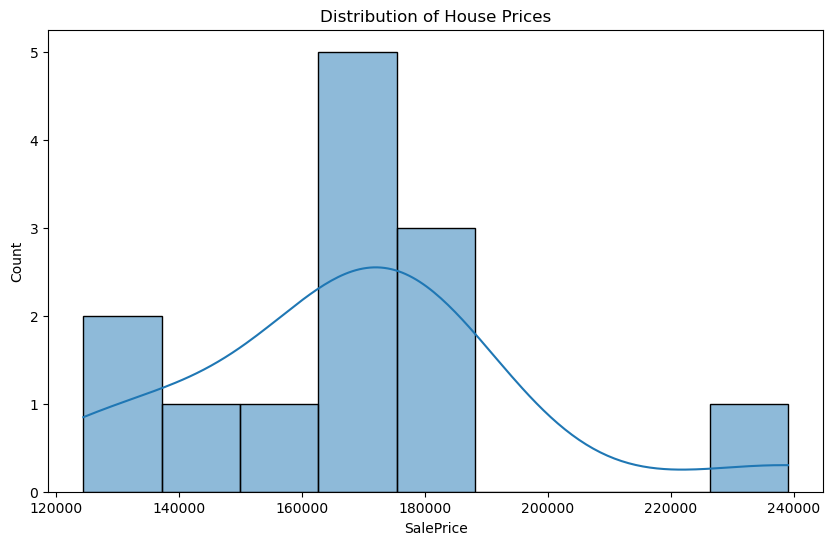

In [162]:
## Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(hd_numeric['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

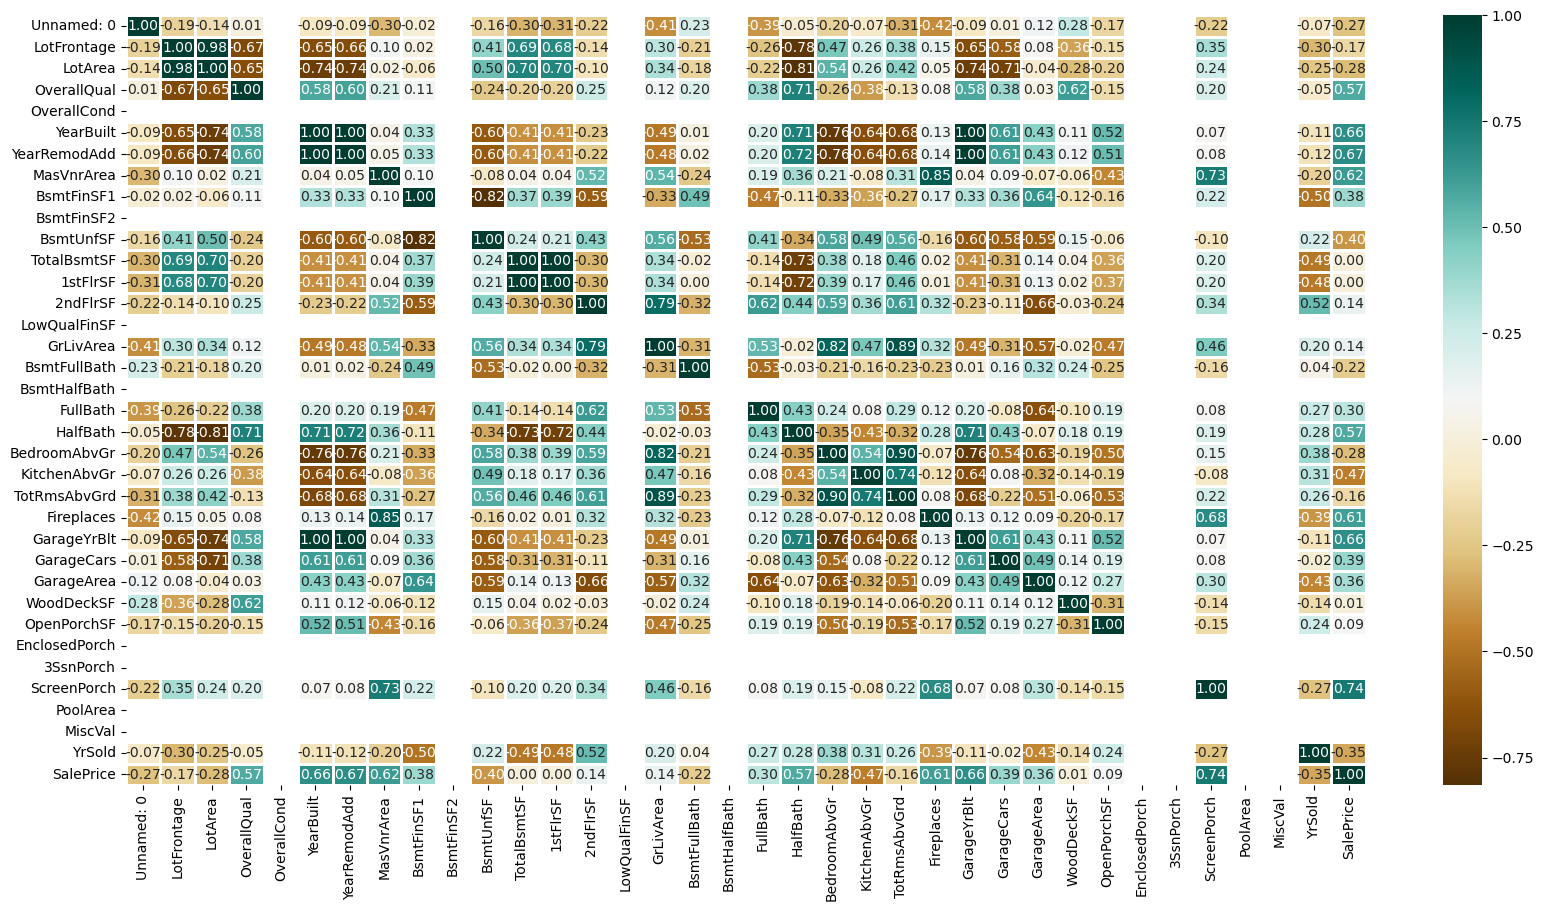

In [110]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()


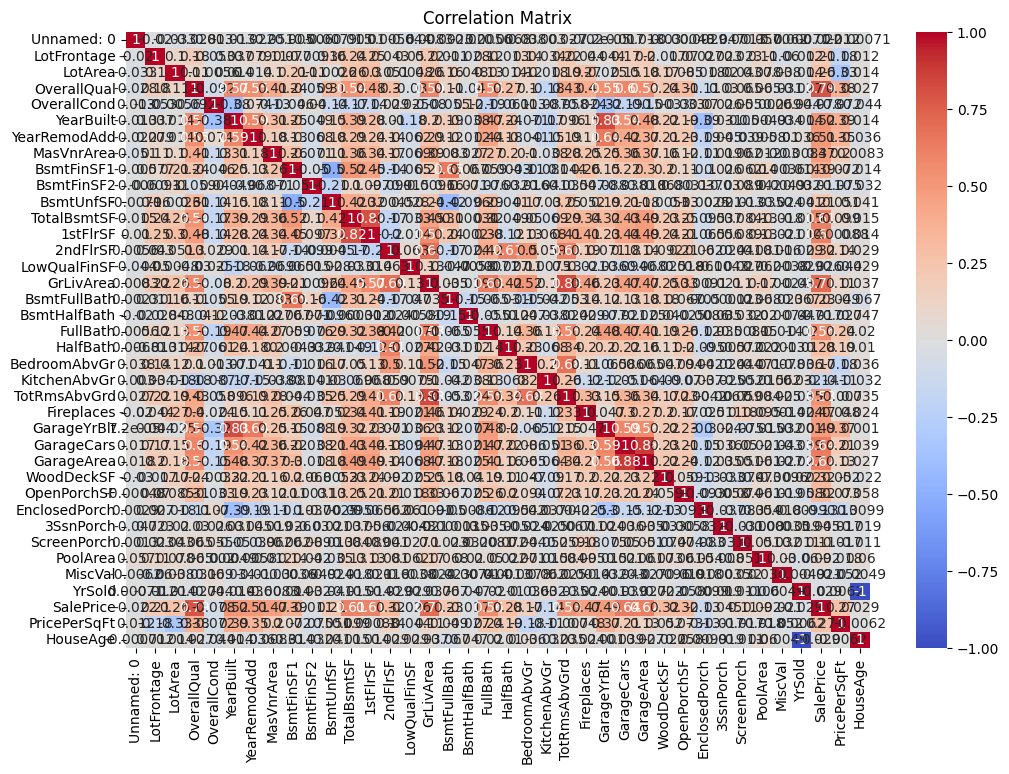

In [21]:
##Multivariate Analysis
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(hd_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


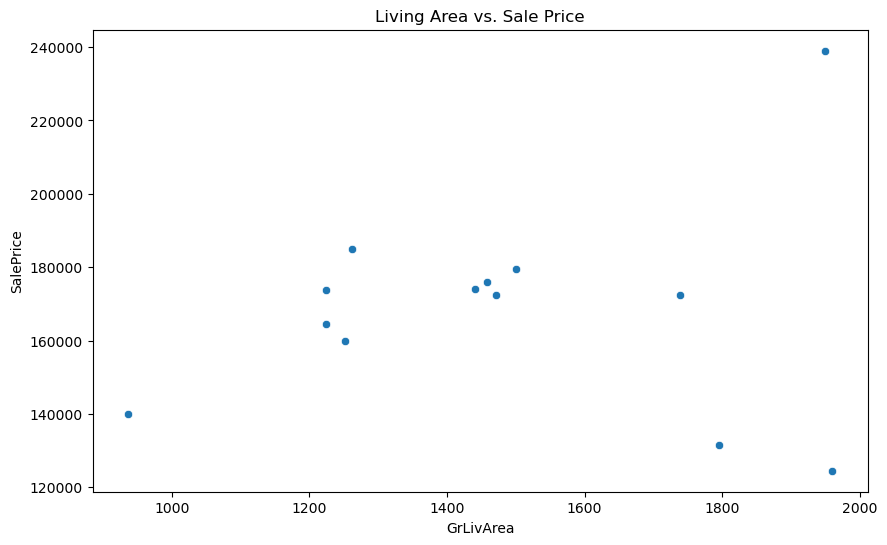

In [148]:
## Feature Engineering and Size Impact

# Scatter plot for size impact
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=hd_numeric)
plt.title('Living Area vs. Sale Price')
plt.show()



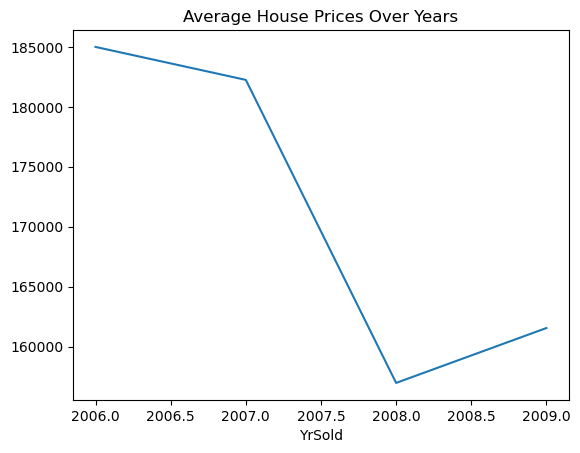

In [146]:
## Market Trends and Historical Pricing

# Line plot for historical pricing
hd_numeric['YrSold'] = pd.to_datetime(hd_numeric['YrSold'], format='%Y')
hd_numeric.groupby(hd_numeric['YrSold'].dt.year)['SalePrice'].mean().plot(kind='line')
plt.title('Average House Prices Over Years')
plt.show()


In [138]:
hd_numeric = hd.drop(columns=non_numeric_cols)
hd_numeric

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
56,56,24,2645,8,5,1999,2000,456,649,0,...,480,115,0,0,0,0,0,0,2009,172500
87,87,40,3951,6,5,2009,2009,76,0,0,...,528,0,234,0,0,0,0,0,2009,164500
115,115,34,3230,6,5,1999,1999,1129,419,0,...,440,0,32,0,0,0,0,0,2007,176000
281,281,60,7200,6,5,2006,2006,68,905,0,...,572,0,120,0,0,0,0,0,2006,185000
297,297,66,7399,7,5,1997,1998,1600,649,0,...,576,0,10,0,0,198,0,0,2007,239000
505,505,60,7596,5,5,1952,1952,360,0,0,...,400,0,0,0,0,0,0,0,2009,124500
579,579,81,12150,5,5,1954,1954,335,0,0,...,352,0,0,0,0,0,0,0,2008,131500
755,755,34,3230,6,5,1999,1999,894,381,0,...,440,0,24,0,0,0,0,0,2009,172500
758,758,24,2280,7,5,1999,1999,360,549,0,...,440,0,0,0,0,0,0,0,2008,179400
914,914,30,3000,6,5,2009,2009,76,294,0,...,528,0,234,0,0,0,0,0,2009,173733


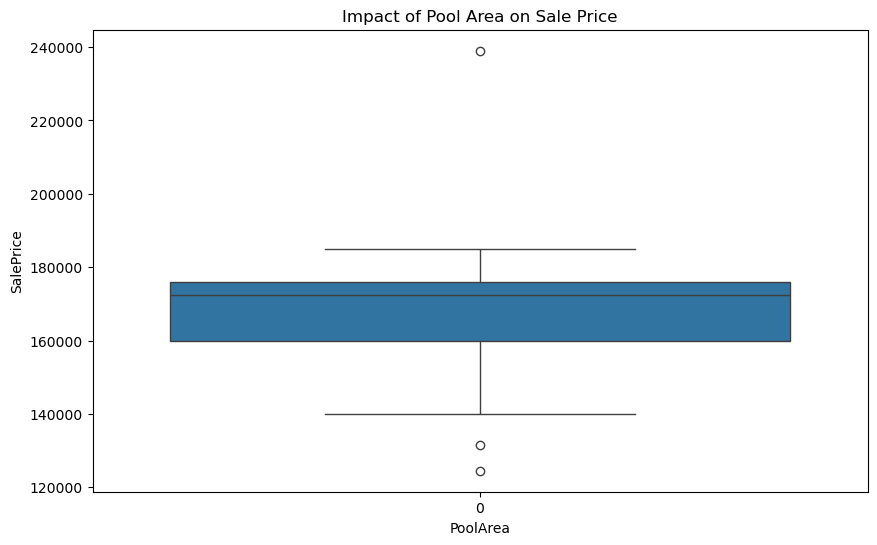

In [142]:
##Customer Preferences and Amenities

# Box plot for amenities impact

plt.figure(figsize=(10, 6))
sns.boxplot(x='PoolArea', y='SalePrice', data=hd_numeric)
plt.title('Impact of Pool Area on Sale Price')
plt.show()

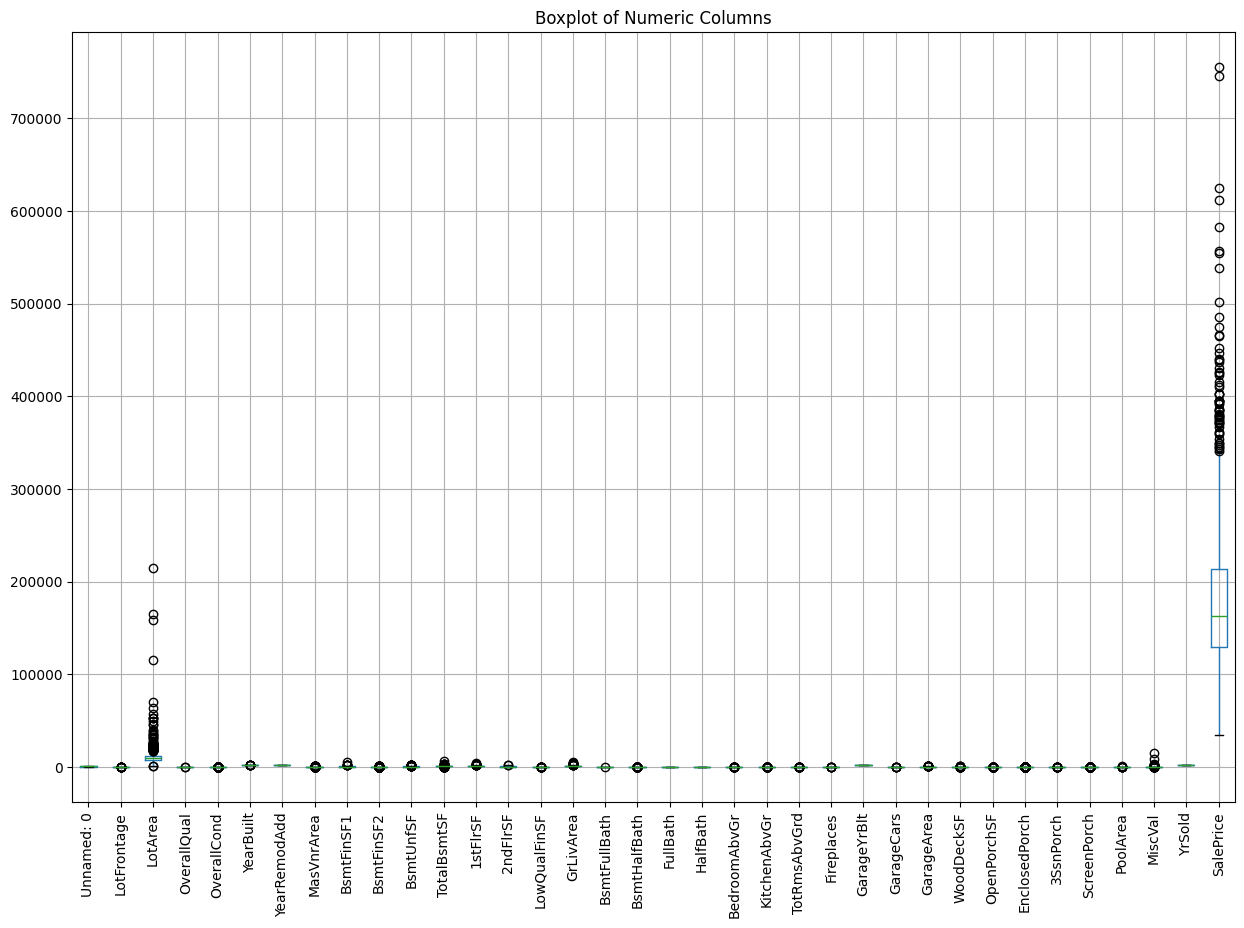

In [23]:
Identify outliers in multiple columns
numeric_cols = hd.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
hd[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot of Numeric Columns')
plt.show()


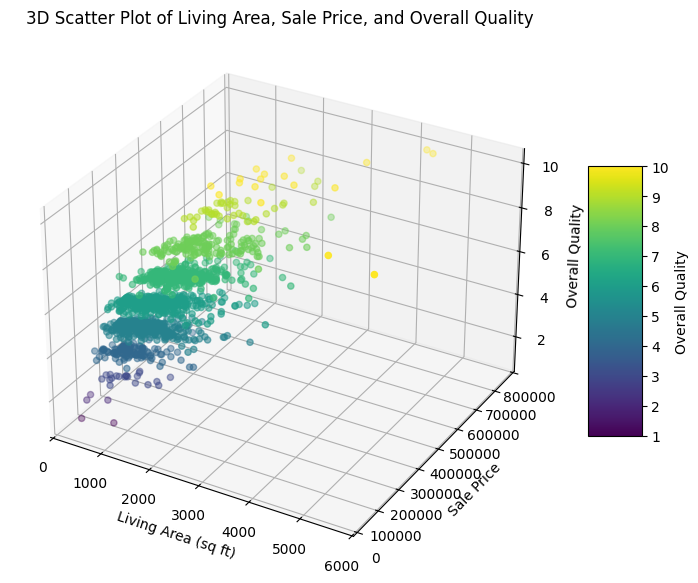

In [31]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the variables
x = hd['GrLivArea']
y = hd['SalePrice']
z = hd['OverallQual']

# Create the scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Add labels
ax.set_xlabel('Living Area (sq ft)')
ax.set_ylabel('Sale Price')
ax.set_zlabel('Overall Quality')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Overall Quality')

plt.title('3D Scatter Plot of Living Area, Sale Price, and Overall Quality')
plt.show()


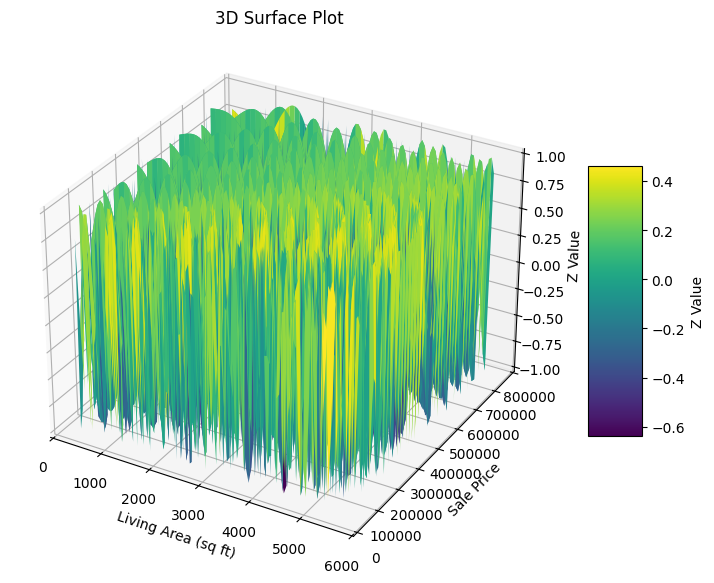

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate data for the surface plot
x = np.linspace(hd['GrLivArea'].min(), hd['GrLivArea'].max(), 100)
y = np.linspace(hd['SalePrice'].min(), hd['SalePrice'].max(), 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
surface = ax.plot_surface(x, y, z, cmap='viridis')

# Add labels
ax.set_xlabel('Living Area (sq ft)')
ax.set_ylabel('Sale Price')
ax.set_zlabel('Z Value')

# Add a color bar
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Z Value')

plt.title('3D Surface Plot')
plt.show()
